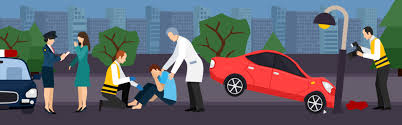

# Road Accident Severity Classification


In [1]:
import pandas as pd
import os
import numpy as np

csv_filename1 = "data/tv_noaa.csv"
df = pd.read_csv(csv_filename1)

In [2]:
df.drop(columns=['Accident','Violation Type','Charge','Article','Contributed To Accident','Article','HAZMAT','Personal Injury','Fatal'],inplace=True)

In [3]:
df

,Latitude,Longitude,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,...,LONGITUDE,AWND,PGTM,PRCP,TMAX,WSF2,WSF5,TMIN,WDF2,WDF5
0,38.997645,-77.027105,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,2.2,2301.0,41.1,15.6,9.8,16.1,10.0,300.0,320.0
1,38.997566,-77.109724,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,3.4,1356.0,0.5,12.8,7.6,11.6,6.1,230.0,220.0
2,39.223205,-77.260313,No,Yes,No,No,No,No,MD,02 - Automobile,...,-75.12284,2.9,1452.0,0.0,26.7,6.7,10.7,11.1,230.0,230.0
3,39.057987,-76.968677,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,4.0,1231.0,0.0,18.9,8.1,11.6,7.2,10.0,360.0
4,38.999282,-77.026098,No,Yes,No,No,No,No,MD,02 - Automobile,...,-75.12284,0.9,2212.0,4.3,20.6,4.5,6.7,11.1,320.0,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,0.000000,0.000000,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,1.5,932.0,0.0,22.2,5.4,8.1,13.3,30.0,30.0
1782,0.000000,0.000000,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,1.0,1613.0,0.0,22.2,2.2,3.1,8.3,20.0,360.0
1783,0.000000,0.000000,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,0.8,1159.0,0.0,23.3,3.6,6.3,6.7,160.0,200.0
1784,39.144320,-77.067415,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,3.8,1519.0,0.0,9.4,8.9,13.0,1.1,290.0,310.0


#### Let's take a look at the dataset

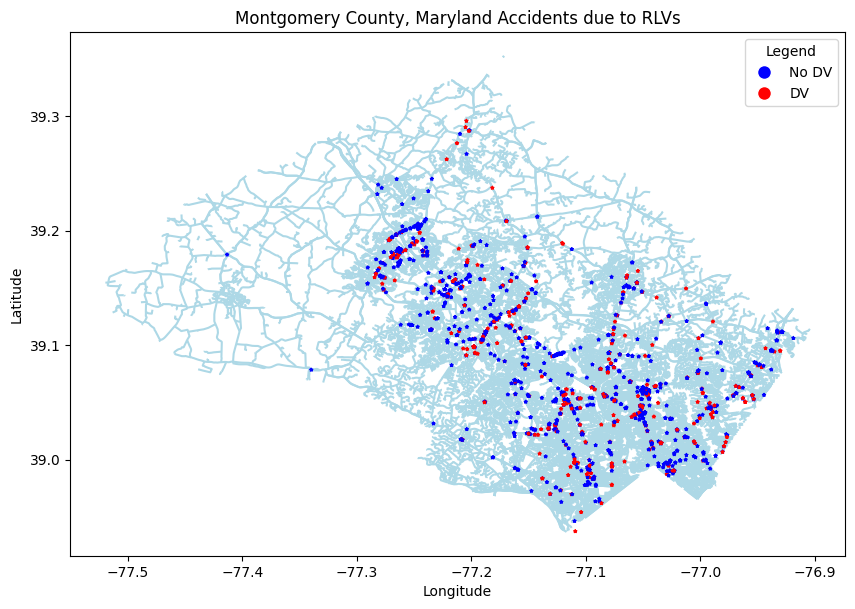

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

filtered_df = df[(df['Latitude'] != 0) & (df['Longitude'] != 0) & (df['Longitude'] <= -76.9)& (df['Latitude'] >=38.93)]
montgomery_shapefile_path = './data/roads/tl_2019_24031_roads.shp'
montgomery_gdf = gpd.read_file(montgomery_shapefile_path)

geometry = [Point(xy) for xy in zip(filtered_df['Longitude'], filtered_df['Latitude'])]
geo_points = gpd.GeoDataFrame(filtered_df, geometry=geometry)

fig, ax = plt.subplots(figsize=(10, 10))

montgomery_gdf.plot(ax=ax, color='lightblue', edgecolor='black', zorder=1)
geo_points.plot(ax=ax, marker='*', color=filtered_df['DV'].map({0: 'blue', 1: 'red'}), markersize=5, zorder=2)

legend_labels = {0: 'No DV', 1: 'DV'}
ax.legend([plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)],
          [legend_labels[0], legend_labels[1]], title='Legend', loc='upper right')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Montgomery County, Maryland Accidents due to RLVs')
plt.show()


In [5]:
df.drop(columns=['Latitude', 'Longitude'],inplace=True)

In [6]:
import pandas as pd
from sklearn.impute import SimpleImputer


data_for_imputation = df.copy()

categorical_imputer = SimpleImputer(strategy='most_frequent')

imputed_values = categorical_imputer.fit_transform(data_for_imputation)

imputed_df = pd.DataFrame(imputed_values,columns=df.columns)

df= imputed_df

df


,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,...,LONGITUDE,AWND,PGTM,PRCP,TMAX,WSF2,WSF5,TMIN,WDF2,WDF5
0,No,No,No,No,No,No,MD,02 - Automobile,2020.0,LINC,...,-75.12284,2.2,2301.0,41.1,15.6,9.8,16.1,10.0,300.0,320.0
1,No,No,No,No,No,No,MD,02 - Automobile,2023.0,MAZDA,...,-75.12284,3.4,1356.0,0.5,12.8,7.6,11.6,6.1,230.0,220.0
2,No,Yes,No,No,No,No,MD,02 - Automobile,2023.0,VOLK,...,-75.12284,2.9,1452.0,0.0,26.7,6.7,10.7,11.1,230.0,230.0
3,No,No,No,No,No,No,MD,02 - Automobile,2012.0,HONDA,...,-75.12284,4.0,1231.0,0.0,18.9,8.1,11.6,7.2,10.0,360.0
4,No,Yes,No,No,No,No,MD,02 - Automobile,2018.0,HOND,...,-75.12284,0.9,2212.0,4.3,20.6,4.5,6.7,11.1,320.0,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,No,No,No,No,No,No,MD,02 - Automobile,2005.0,HOND,...,-75.12284,1.5,932.0,0.0,22.2,5.4,8.1,13.3,30.0,30.0
1782,No,No,No,No,No,No,MD,02 - Automobile,1997.0,MITS,...,-75.12284,1.0,1613.0,0.0,22.2,2.2,3.1,8.3,20.0,360.0
1783,No,No,No,No,No,No,MD,02 - Automobile,2005.0,HOND,...,-75.12284,0.8,1159.0,0.0,23.3,3.6,6.3,6.7,160.0,200.0
1784,No,No,No,No,No,No,MD,02 - Automobile,1996.0,ISUZU,...,-75.12284,3.8,1519.0,0.0,9.4,8.9,13.0,1.1,290.0,310.0


In [7]:
def classify_vehicle(vehicle_type):
    if any(category in vehicle_type for category in ['01 - Motorcycle']):
        return 'Light'
    elif any(category in vehicle_type for category in ['28 - Other','29 - Unknown', '03 - Station Wagon', '02 - Automobile']):
        return 'Medium'
    elif any(category in vehicle_type for category in ['05 - Light Duty Truck', '07 - Truck/Road Tractor', '08 - Recreational Vehicle',]):
        return 'Heavy'
    else:
        return 'Very Heavy'
    
df['VehicleType'] = df['VehicleType'].apply(classify_vehicle)

In [8]:
df['Year']=df['Year'].astype(int)
df['Vehicle'] = df[[ 'Year', 'Make', 'Model']].astype(str).apply(lambda x: ', '.join(x), axis=1)
df.drop(columns=['Year', 'Make', 'Model'],inplace=True)

In [9]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['Weekend'] = df['DATE'].dt.dayofweek.apply(lambda x: 1 if x in [5, 6] else 0)
df['Time'] = df['DATE'].dt.time
df['DATE'] = df['DATE'].dt.date

In [10]:
def sine_of_time(time):
    return np.sin(2 * np.pi * (time.hour * 3600 + time.minute * 60 + time.second) / (24 * 3600))

df['SinOfTime'] = df['Time'].apply(sine_of_time)

In [11]:
def categorize_time(time):
    if 5 < time.hour <= 9:
        return 'am-peak'
    elif 12 < time.hour <= 14:
        return 'mid-peak'
    elif 16 < time.hour <= 20:
        return 'pm-peak'
    else:
        return 'non-peak'
    
df['TimeCategory'] = df['Time'].apply(categorize_time)

In [12]:
df=df[['Belts', 'Property Damage', 'Commercial License', 'Commercial Vehicle',
       'Alcohol', 'Work Zone', 'State', 'VehicleType', 'Color', 'Race',
       'Gender', 'Driver City', 'Driver State', 'DL State', 'DV', 'DATE',
       'LATITUDE', 'LONGITUDE', 'AWND', 'PGTM', 'PRCP', 'TMAX', 'WSF2', 'WSF5',
       'TMIN', 'WDF2', 'WDF5', 'Vehicle', 'Weekend', 'Time', 'SinOfTime',
       'TimeCategory']]


In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

columns_to_label_encode = ['Belts', 'Property Damage', 'Commercial License', 
                           'Commercial Vehicle', 'Alcohol', 'Gender', 'Work Zone']

columns_to_onehot_encode = ['VehicleType','Race',  'TimeCategory']

for column in columns_to_label_encode:
    df[column] = label_encoder.fit_transform(df[column])

onehot_encoded = onehot_encoder.fit_transform(df[columns_to_onehot_encode]).toarray()
onehot_columns = onehot_encoder.get_feature_names_out(columns_to_onehot_encode)
df_onehot = pd.DataFrame(onehot_encoded, columns=onehot_columns)

df = pd.concat([df, df_onehot], axis=1)

df = df.drop(columns=columns_to_onehot_encode)
df

,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,State,Color,Gender,Driver City,...,Race_ASIAN,Race_BLACK,Race_HISPANIC,Race_NATIVE AMERICAN,Race_OTHER,Race_WHITE,TimeCategory_am-peak,TimeCategory_mid-peak,TimeCategory_non-peak,TimeCategory_pm-peak
0,0,0,0,0,0,0,MD,WHITE,0,COLUMBIA,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0,0,MD,"BLUE, LIGHT",1,LANHAM,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,1,0,0,0,0,MD,WHITE,0,CLARKSBURG,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,0,0,0,0,MD,GRAY,0,SILVER SPRING,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,1,0,0,0,0,MD,BLACK,0,SILVER SPRING,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,0,0,0,0,0,0,MD,GREEN,1,OLNEY,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1782,0,0,0,0,0,0,MD,BLACK,1,POTOMAC,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1783,0,0,0,0,0,0,MD,BLACK,1,OLNEY,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1784,0,0,0,0,0,0,MD,WHITE,1,GERMANTOWN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Data Preprocessing

In [14]:
df=df[['Belts', 'Property Damage', 'Commercial License', 'Commercial Vehicle',
       'Alcohol', 'Work Zone', 'SinOfTime', 'Weekend', 'Gender', 'DV',  'AWND', 'PGTM', 'PRCP', 'TMAX', 'WSF2', 'WSF5',
       'TMIN', 'WDF2', 'WDF5', 'VehicleType_Heavy',
       'VehicleType_Light', 'VehicleType_Medium', 'VehicleType_Very Heavy',
       'Race_ASIAN', 'Race_BLACK', 'Race_HISPANIC', 'Race_NATIVE AMERICAN',
       'Race_OTHER', 'Race_WHITE', 'TimeCategory_am-peak',
       'TimeCategory_mid-peak', 'TimeCategory_non-peak',
       'TimeCategory_pm-peak']]

In [15]:
x=df.drop(columns=['DV'])
y=df['DV']
# x['tmpf'] = pd.to_numeric(x['tmpf'], errors='coerce')
# x['dwpf'] = pd.to_numeric(x['dwpf'], errors='coerce')
# x['sknt'] = pd.to_numeric(x['sknt'], errors='coerce')
# x['relh'] = pd.to_numeric(x['relh'], errors='coerce')
# x['alti'] = pd.to_numeric(x['alti'], errors='coerce')
# x['vsby'] = pd.to_numeric(x['vsby'], errors='coerce')
# x['feel'] = pd.to_numeric(x['feel'], errors='coerce')

y = pd.to_numeric(y, errors='coerce')

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,
                                                    random_state=42, stratify=y)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import KFold # import KFold
import warnings

In [18]:
models={"LogisticRegression":LogisticRegression(),
        "DecisionTreeClassifier":DecisionTreeClassifier(),
        "SVM":SVC(),
        "KNeighborsClassifier":KNeighborsClassifier(),
        "GNB":GaussianNB(),
       "RandomForestClassifier":RandomForestClassifier(),
        "AdaBoostClassifier":AdaBoostClassifier(),
        "GradientBoostingClassifier":GradientBoostingClassifier(),
        }

In [19]:
# models,x,y,scaleFlag=0,1,2
def modelAccuracy(models,x,y,scaleFlag):
    #train/Test
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
    acc_result={}
    for name,model in models.items():
        #pipeline
        #1.Transformer -> 2.Model
        if(scaleFlag==1):
            model_pipeline=Pipeline([('MinMaxScler',MinMaxScaler()),('model',model)])
        elif(scaleFlag==2):
             model_pipeline=Pipeline([('StandardScaler',StandardScaler()),('model',model)])
        else:
            model_pipeline=Pipeline([('model',model)])
        #training/testing on model pipeline
        model_fit=model_pipeline.fit(xtrain,ytrain)
        ypred=model_fit.predict(xtest)
        acc=accuracy_score(ytest,ypred)
        print("The Accuracy for ",name," is :",acc)
        acc_result[name]=acc
    return acc_result

In [20]:
def bestModel(result):
    high=0
    for name,acc in result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best Model is ",model_name," with accuaracy =>",high)

In [21]:
def bestParams(model,param,xtrain,ytrain):
    #cv
    cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3)
    grid_cv=GridSearchCV(estimator=model,param_grid=param,cv=cv,scoring="f1_weighted")
    res=grid_cv.fit(xtrain,ytrain)
    print("Best Parameters are ",res.best_params_)
    print("Best Accuracy is ",res.best_score_)

In [23]:
acc=modelAccuracy(models,X_train,y_train,1)

The Accuracy for  LogisticRegression  is : 0.7272727272727273
The Accuracy for  DecisionTreeClassifier  is : 0.7062937062937062
The Accuracy for  SVM  is : 0.7062937062937062


The Accuracy for  KNeighborsClassifier  is : 0.6888111888111889
The Accuracy for  GNB  is : 0.5559440559440559
The Accuracy for  RandomForestClassifier  is : 0.7132867132867133
The Accuracy for  AdaBoostClassifier  is : 0.7202797202797203
The Accuracy for  GradientBoostingClassifier  is : 0.7202797202797203


In [24]:
bestModel(acc)

Best Model is  LogisticRegression  with accuaracy => 0.7272727272727273


In [25]:
model=RandomForestClassifier()
params={"n_estimators" : [100,200],
        "criterion" : ["gini","entropy"]
        }
bestParams(model,params,X_train,y_train)

Best Parameters are  {'criterion': 'entropy', 'n_estimators': 100}
Best Accuracy is  0.708732979555877
